##Недостатки полносвязных (многослойных) нейронных сетей


1.   Большое количество весов для обучения (28х28 = 784 входа и 800 + 10 нейронов => 635200 весов

2.  Изображение представляется в виде плоского массива => теряется информация о топологии






##Сверточные нейронные сети

Свёрточная нейронная сеть (англ. convolutional neural network, CNN) — специальная архитектура искусственных нейронных сетей, предложенная Яном Лекуном в 1988 году и нацеленная на эффективное распознавание образов. Использует некоторые представления об особенностях зрительной коры мозга.

Сверточные нейронные сети обеспечивают частичную устойчивость к изменениям масштаба, смещениям, поворотам, смене ракурса и прочим искажениям.

CNN состоит из разных видов слоев: сверточные (convolutional) слои, субдискретизирующие (sub-sampling или pooling layers, подвыборка) слои и слои «обычной» нейронной сети – персептрона

![4r8-t4d26oc1pw5tt3pd373qa2g[1].png](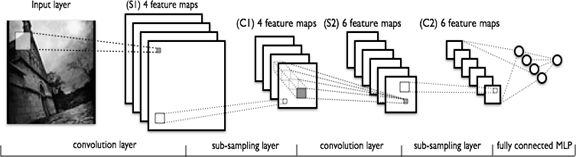)

Первые два типа слоев (convolutional, subsampling или pooling layers), чередуясь между собой, формируют входной вектор признаков для многослойного персептрона. 

Название архитектура сети получила из-за наличия операции свёртки, суть которой в том, что каждый фрагмент изображения умножается на матрицу (ядро)

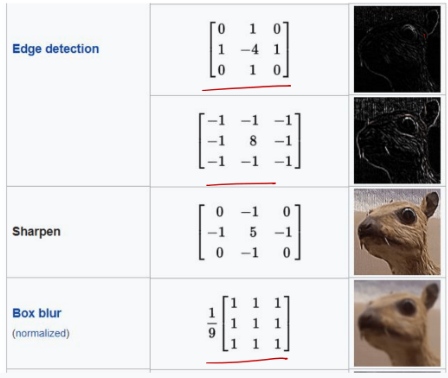

свёртки поэлементно, а результат суммируется и записывается в аналогичную позицию выходного изображения.

![2D_Convolution_Animation[1].gif](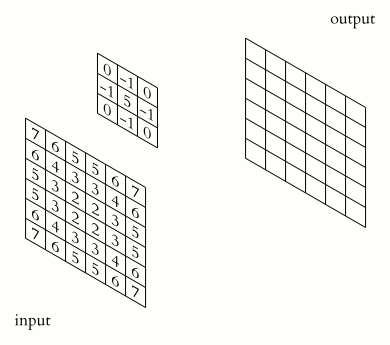)

![2d-covolutions[1].gif](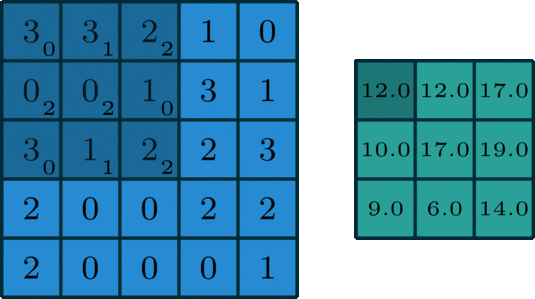)

Работа свёрточной нейронной сети обычно интерпретируется как переход от конкретных особенностей изображения к более абстрактным деталям, и далее к ещё более абстрактным деталям вплоть до выделения понятий высокого уровня. При этом сеть самонастраивается и вырабатывает сама необходимую иерархию абстрактных признаков (последовательности карт признаков), фильтруя маловажные детали и выделяя существенное.



Слой пулинга (иначе подвыборки, субдискретизации) представляет собой нелинейное уплотнение карты признаков, при этом группа пикселей (обычно размера 2×2) уплотняется до одного пикселя, проходя нелинейное преобразование. Наиболее употребительна при этом функция максимума. Преобразования затрагивают непересекающиеся прямоугольники или квадраты, каждый из которых ужимается в один пиксель, при этом выбирается пиксель, имеющий максимальное значение. Операция пулинга позволяет существенно уменьшить пространственный объём изображения. Пулинг интерпретируется так: если на предыдущей операции свёртки уже были выявлены некоторые признаки, то для дальнейшей обработки настолько подробное изображение уже не нужно, и оно уплотняется до менее подробного. К тому же фильтрация уже ненужных деталей помогает не переобучаться. Слой пулинга, как правило, вставляется после слоя свёртки перед слоем следующей свёртки.

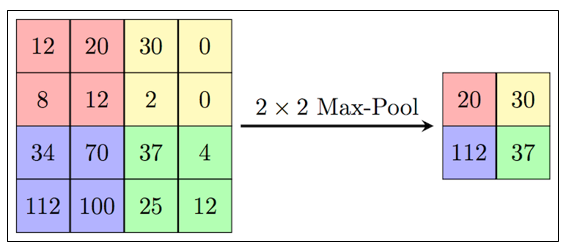

Может быть так:


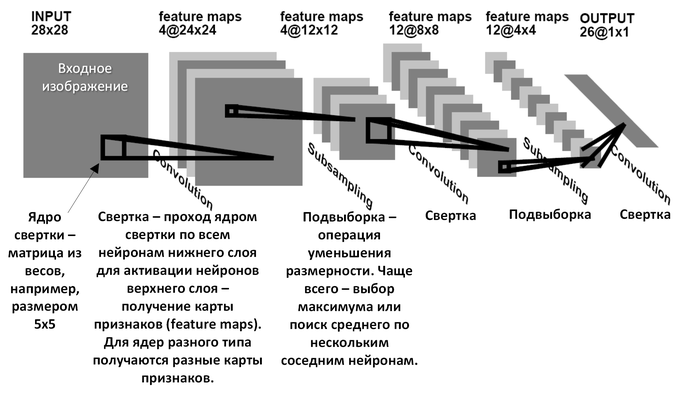

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from keras.models import Model 
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 28, 28
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных MNIST
classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Подготовка данных

**Загружаем данные**

In [4]:
(s_X_train, y_train), (s_X_test, y_test) = mnist.load_data()
print(y_train)

11493376/11490434 [==============================] - 0s 0us/step
[5 0 4 ... 5 6 8]


In [5]:
sample_shape = s_X_train[0].shape
img_width, img_height = sample_shape[0], sample_shape[1]
input_shape = (img_width, img_height, 1)

num_train = 60000
num_test = 10000

print(input_shape)

(28, 28, 1)


**Просмотр примеров данных**

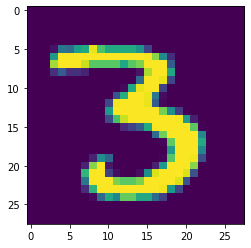

Номер класса: 3
Тип объекта: 3


In [6]:
n = 12
plt.imshow(s_X_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n]])

**Нормализуем данные**

In [7]:
X_train = s_X_train.reshape(num_train, img_width, img_height, 1).astype('float32')
X_test = s_X_test.reshape(num_test, img_width, img_height, 1).astype('float32')
X_train /= 255
X_test /= 255

**Преобразуем правильные ответы в формат one hot encoding**

In [8]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Создаем нейронную сеть

In [9]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=input_shape, activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

Dropout - техника борьбы с переобучением, когда с заданной вероятностью отключаются нейроны.

**Печатаем информацию о сети**

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

**Компилируем модель**

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [12]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/25
422/422 - 37s - loss: 1.8485 - accuracy: 0.3528 - val_loss: 0.4446 - val_accuracy: 0.8857
Epoch 2/25
422/422 - 7s - loss: 0.5391 - accuracy: 0.8268 - val_loss: 0.1881 - val_accuracy: 0.9480
Epoch 3/25
422/422 - 7s - loss: 0.3267 - accuracy: 0.8978 - val_loss: 0.1263 - val_accuracy: 0.9628
Epoch 4/25
422/422 - 7s - loss: 0.2456 - accuracy: 0.9235 - val_loss: 0.1008 - val_accuracy: 0.9700
Epoch 5/25
422/422 - 7s - loss: 0.2021 - accuracy: 0.9372 - val_loss: 0.0847 - val_accuracy: 0.9770
Epoch 6/25
422/422 - 7s - loss: 0.1763 - accuracy: 0.9452 - val_loss: 0.0748 - val_accuracy: 0.9785
Epoch 7/25
422/422 - 7s - loss: 0.1583 - accuracy: 0.9510 - val_loss: 0.0727 - val_accuracy: 0.9792
Epoch 8/25
422/422 - 7s - loss: 0.1426 - accuracy: 0.9547 - val_loss: 0.0667 - val_accuracy: 0.9805
Epoch 9/25
422/422 - 7s - loss: 0.1328 - accuracy: 0.9576 - val_loss: 0.0628 - val_accuracy: 0.9827
Epoch 10/25
422/422 - 7s - loss: 0.1247 - accuracy: 0.9603 - val_loss: 0.0588 - val_accuracy: 0.984

## Оцениваем качество обучения сети

In [13]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 98.94%


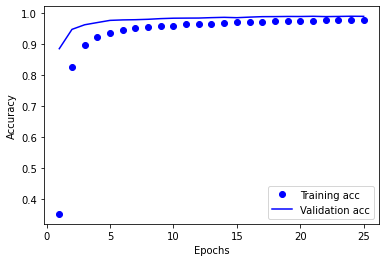

In [14]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Применяем сеть для распознавания объектов на изображениях

0.jpg


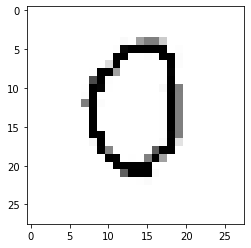

Номер класса: 0
Название класса: 0
1.jpg


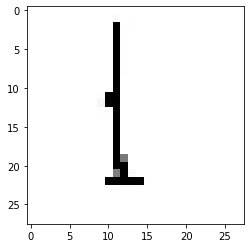

Номер класса: 6
Название класса: 6
2.jpg


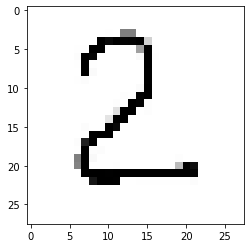

Номер класса: 2
Название класса: 2
3.jpg


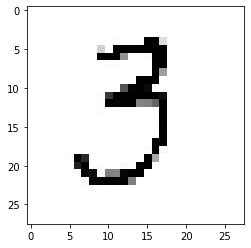

Номер класса: 3
Название класса: 3
4.jpg


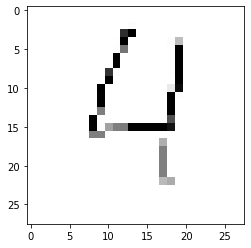

Номер класса: 4
Название класса: 4
5.jpg


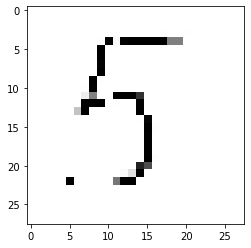

Номер класса: 5
Название класса: 5
6.jpg


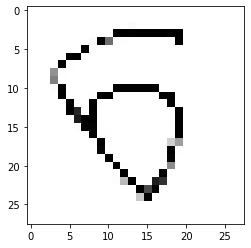

Номер класса: 5
Название класса: 5
7.jpg


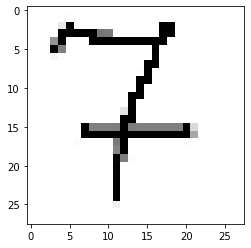

Номер класса: 2
Название класса: 2
8.jpg


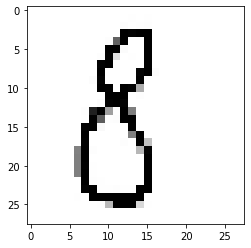

Номер класса: 8
Название класса: 8
9.jpg


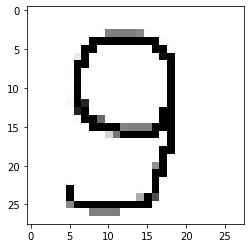

Номер класса: 3
Название класса: 3
01.jpg


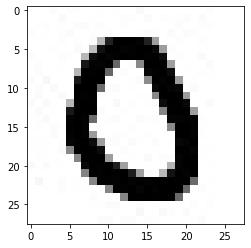

Номер класса: 0
Название класса: 0
11.jpg


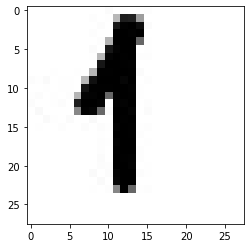

Номер класса: 8
Название класса: 8
21.jpg


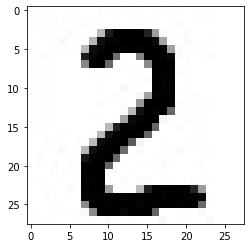

Номер класса: 2
Название класса: 2
31.jpg


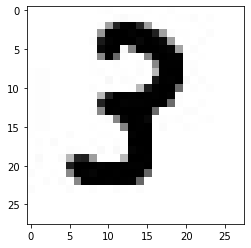

Номер класса: 3
Название класса: 3
41.jpg


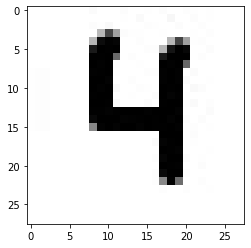

Номер класса: 4
Название класса: 4
51.jpg


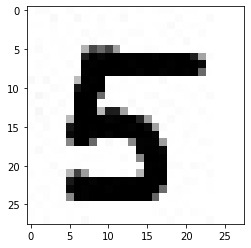

Номер класса: 5
Название класса: 5
61.jpg


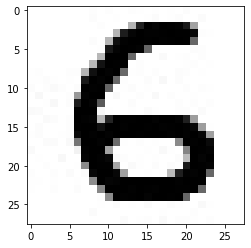

Номер класса: 6
Название класса: 6
71.jpg


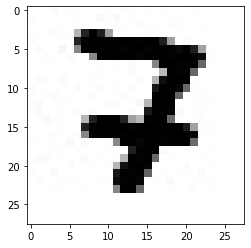

Номер класса: 7
Название класса: 7
81.jpg


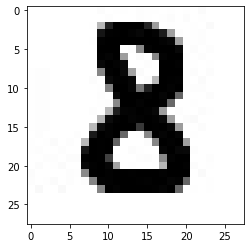

Номер класса: 8
Название класса: 8
91.jpg


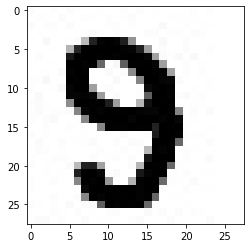

Номер класса: 9
Название класса: 9
02.jpg


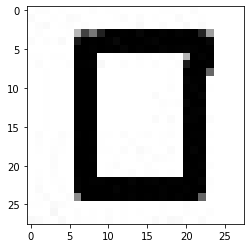

Номер класса: 0
Название класса: 0
12.jpg


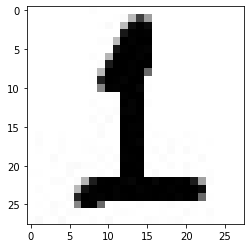

Номер класса: 1
Название класса: 1
22.jpg


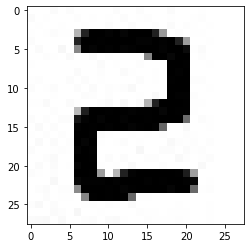

Номер класса: 2
Название класса: 2
32.jpg


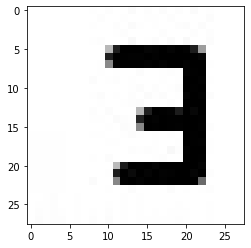

Номер класса: 2
Название класса: 2
42.jpg


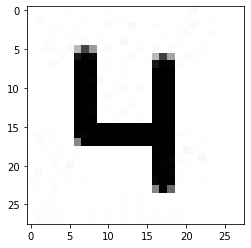

Номер класса: 4
Название класса: 4
52.jpg


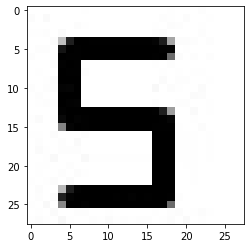

Номер класса: 5
Название класса: 5
62.jpg


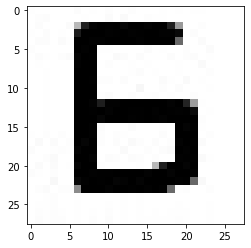

Номер класса: 5
Название класса: 5
72.jpg


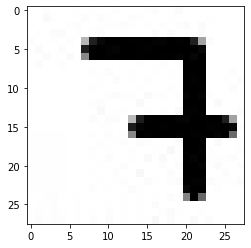

Номер класса: 2
Название класса: 2
82.jpg


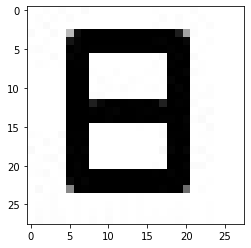

Номер класса: 2
Название класса: 2
92.jpg


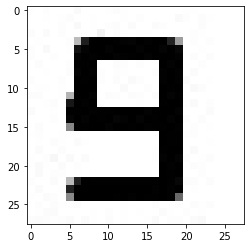

Номер класса: 3
Название класса: 3


In [16]:
img_names = ['0.jpg','1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg',
             '01.jpg','11.jpg','21.jpg','31.jpg','41.jpg','51.jpg','61.jpg','71.jpg','81.jpg','91.jpg',
             '02.jpg','12.jpg','22.jpg','32.jpg','42.jpg','52.jpg','62.jpg','72.jpg','82.jpg','92.jpg']
for n in img_names:
  img = image.load_img(n, target_size=(28, 28),color_mode = "grayscale")
  print(n)
  plt.imshow(img.convert('RGBA'))
  plt.show()
  # Преобразуем картинку в массив
  x = image.img_to_array(img)
  # Меняем форму массива в плоский вектор
  x = x.reshape(1, img_width, img_height, 1)
  # Инвертируем изображение
  x = 255 - x
  # Нормализуем изображение
  x /= 255

  prediction = model.predict(x)
  prediction = np.argmax(prediction)
  print("Номер класса:", prediction)
  print("Название класса:", classes[prediction])

#Итог
Из 30 картинок (3 набора цифр в разных стилях) 22 цифры было угадано верно. 2й набор был отгадан полностью. В сравнении с полносвязной нейронной сетью из предидущего исследования свёрточная показывает значительные улучшения.